In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

Bring in 2016 payment data to look for outliers. Going back to individual year in case we combined to much and buried outliers.

In [2]:
df_payments_2016 = pd.read_pickle('../data/df_payments_2016.pkl')

In [3]:
# add payment_type column (added to combined dataframe in step2 notebook)

conditions = [
    (df_payments_2016.place_of_service == 'O'),
    (df_payments_2016.entity_type_of_the_provider == 'I') & 
    (df_payments_2016.place_of_service == 'F'),
    (df_payments_2016.entity_type_of_the_provider == 'O') & 
    (df_payments_2016.place_of_service == 'F')
]

choices = ['Doctor & Facility', 'Doctor Only', 'Facility Only']

In [4]:
df_payments_2016['payment_type'] = np.select(conditions, choices, default = 'unknown')

In [6]:
df_payments_2016['payment_type'].unique()

# confirmed there are no unknowns

array(['Doctor Only', 'Doctor & Facility', 'Facility Only'], dtype=object)

In [7]:
df_payments_2016.head()

,national_provider_identifier,last_name_organization_name_of_the_provider,entity_type_of_the_provider,city_of_the_provider,zip_code_of_the_provider,state_code_of_the_provider,provider_type,place_of_service,hcpcs_code,hcpcs_description,number_of_services,number_of_medicare_beneficiaries,number_of_distinct_medicare_beneficiary_per_day_services,average_medicare_allowed_amount,year,payment_type
0,1003000126,ENKESHAFI,I,CUMBERLAND,215021854,MD,Internal Medicine,F,99217,Hospital observation care discharge,57.0,55,57,72.743158,2016,Doctor Only
1,1003000126,ENKESHAFI,I,CUMBERLAND,215021854,MD,Internal Medicine,F,99219,Hospital observation care typically 50 minutes,38.0,38,38,135.010000,2016,Doctor Only
2,1003000126,ENKESHAFI,I,CUMBERLAND,215021854,MD,Internal Medicine,F,99220,Hospital observation care typically 70 minutes...,23.0,23,23,189.239565,2016,Doctor Only
3,1003000126,ENKESHAFI,I,CUMBERLAND,215021854,MD,Internal Medicine,F,99221,"Initial hospital inpatient care, typically 30 ...",20.0,20,20,100.750000,2016,Doctor Only
4,1003000126,ENKESHAFI,I,CUMBERLAND,215021854,MD,Internal Medicine,F,99222,"Initial hospital inpatient care, typically 50 ...",96.0,87,96,136.250000,2016,Doctor Only


In [8]:
df_payments_2016.average_medicare_allowed_amount.describe()

count    9.714896e+06
mean     1.001832e+02
std      2.563474e+02
min      1.059603e-04
25%      2.376626e+01
50%      6.409993e+01
75%      1.135600e+02
max      5.060338e+04
Name: average_medicare_allowed_amount, dtype: float64

In [9]:
df_payments_2016_doc = df_payments_2016[df_payments_2016['payment_type'] == 'Doctor Only']
df_payments_2016_doc.head(20)

,national_provider_identifier,last_name_organization_name_of_the_provider,entity_type_of_the_provider,city_of_the_provider,zip_code_of_the_provider,state_code_of_the_provider,provider_type,place_of_service,hcpcs_code,hcpcs_description,number_of_services,number_of_medicare_beneficiaries,number_of_distinct_medicare_beneficiary_per_day_services,average_medicare_allowed_amount,year,payment_type
0,1003000126,ENKESHAFI,I,CUMBERLAND,215021854,MD,Internal Medicine,F,99217,Hospital observation care discharge,57.0,55,57,72.743158,2016,Doctor Only
1,1003000126,ENKESHAFI,I,CUMBERLAND,215021854,MD,Internal Medicine,F,99219,Hospital observation care typically 50 minutes,38.0,38,38,135.010000,2016,Doctor Only
2,1003000126,ENKESHAFI,I,CUMBERLAND,215021854,MD,Internal Medicine,F,99220,Hospital observation care typically 70 minutes...,23.0,23,23,189.239565,2016,Doctor Only
3,1003000126,ENKESHAFI,I,CUMBERLAND,215021854,MD,Internal Medicine,F,99221,"Initial hospital inpatient care, typically 30 ...",20.0,20,20,100.750000,2016,Doctor Only
4,1003000126,ENKESHAFI,I,CUMBERLAND,215021854,MD,Internal Medicine,F,99222,"Initial hospital inpatient care, typically 50 ...",96.0,87,96,136.250000,2016,Doctor Only
5,1003000126,ENKESHAFI,I,CUMBERLAND,215021854,MD,Internal Medicine,F,99223,"Initial hospital inpatient care, typically 70 ...",148.0,141,148,203.793919,2016,Doctor Only
6,1003000126,ENKESHAFI,I,CUMBERLAND,215021854,MD,Internal Medicine,F,99225,"Subsequent observation care, typically 25 minu...",11.0,11,11,72.480000,2016,Doctor Only
7,1003000126,ENKESHAFI,I,CUMBERLAND,215021854,MD,Internal Medicine,F,99232,"Subsequent hospital inpatient care, typically ...",596.0,270,596,71.864362,2016,Doctor Only
8,1003000126,ENKESHAFI,I,CUMBERLAND,215021854,MD,Internal Medicine,F,99233,"Subsequent hospital inpatient care, typically ...",117.0,85,117,103.540000,2016,Doctor Only
9,1003000126,ENKESHAFI,I,CUMBERLAND,215021854,MD,Internal Medicine,F,99238,"Hospital discharge day management, 30 minutes ...",20.0,20,20,72.120000,2016,Doctor Only


In [10]:
df_payments_2016.average_medicare_allowed_amount.describe()

count    9.714896e+06
mean     1.001832e+02
std      2.563474e+02
min      1.059603e-04
25%      2.376626e+01
50%      6.409993e+01
75%      1.135600e+02
max      5.060338e+04
Name: average_medicare_allowed_amount, dtype: float64

In [11]:
df_payments_2016_doc.average_medicare_allowed_amount.describe()

count    3.649618e+06
mean     1.184822e+02
std      1.821081e+02
min      1.000000e-02
25%      3.750000e+01
50%      7.477000e+01
75%      1.314702e+02
max      5.868610e+03
Name: average_medicare_allowed_amount, dtype: float64

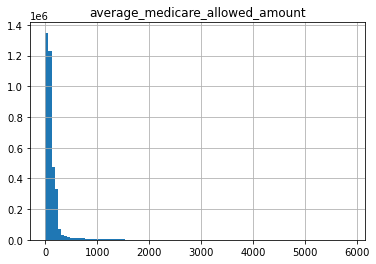

In [14]:
df_payments_2016_doc.hist(column = 'average_medicare_allowed_amount', bins = 100);

In [ ]:
# slice 2016 data on doctor only payment_type to exclude outliers
# formula for outliers: 

df_payments_2016_doc_out = df_payments_2016_doc[df_payments_2016_doc.between(['average_medicare_allowed_amount'] ]


In [15]:
df_payments_2016_fac = df_payments_2016[df_payments_2016['payment_type'] == 'Facility Only']
df_payments_2016_fac.head()

,national_provider_identifier,last_name_organization_name_of_the_provider,entity_type_of_the_provider,city_of_the_provider,zip_code_of_the_provider,state_code_of_the_provider,provider_type,place_of_service,hcpcs_code,hcpcs_description,number_of_services,number_of_medicare_beneficiaries,number_of_distinct_medicare_beneficiary_per_day_services,average_medicare_allowed_amount,year,payment_type
708,1003006180,"MEDICWEST AMBULANCE, INC.",O,NORTH LAS VEGAS,890327836,NV,Ambulance Service Provider,F,A0425,"Ground mileage, per statute mile",82833.3,8218,13971,7.255752,2016,Facility Only
709,1003006180,"MEDICWEST AMBULANCE, INC.",O,NORTH LAS VEGAS,890327836,NV,Ambulance Service Provider,F,A0426,"Ambulance service, advanced life support, non-...",495.0,469,495,279.970081,2016,Facility Only
710,1003006180,"MEDICWEST AMBULANCE, INC.",O,NORTH LAS VEGAS,890327836,NV,Ambulance Service Provider,F,A0427,"Ambulance service, advanced life support, emer...",11376.0,6875,11337,443.190058,2016,Facility Only
711,1003006180,"MEDICWEST AMBULANCE, INC.",O,NORTH LAS VEGAS,890327836,NV,Ambulance Service Provider,F,A0428,"Ambulance service, basic life support, non-eme...",675.0,618,666,233.017259,2016,Facility Only
712,1003006180,"MEDICWEST AMBULANCE, INC.",O,NORTH LAS VEGAS,890327836,NV,Ambulance Service Provider,F,A0429,"Ambulance service, basic life support, emergen...",1021.0,844,1018,373.213203,2016,Facility Only


In [16]:
df_payments_2016_fac.average_medicare_allowed_amount.describe()

count    92936.000000
mean       615.914341
std       1340.541493
min          0.164685
25%        248.370351
50%        393.347651
75%        646.093419
max      39279.280000
Name: average_medicare_allowed_amount, dtype: float64

In [17]:
df_payments_2016_both = df_payments_2016[df_payments_2016['payment_type'] == 'Doctor & Facility']
df_payments_2016_both.head()

,national_provider_identifier,last_name_organization_name_of_the_provider,entity_type_of_the_provider,city_of_the_provider,zip_code_of_the_provider,state_code_of_the_provider,provider_type,place_of_service,hcpcs_code,hcpcs_description,number_of_services,number_of_medicare_beneficiaries,number_of_distinct_medicare_beneficiary_per_day_services,average_medicare_allowed_amount,year,payment_type
26,1003000142,KHALIL,I,TOLEDO,436233536,OH,Anesthesiology,O,99204,"New patient office or other outpatient visit, ...",91.0,91,91,160.23,2016,Doctor & Facility
27,1003000142,KHALIL,I,TOLEDO,436233536,OH,Anesthesiology,O,99205,"New patient office or other outpatient visit, ...",11.0,11,11,201.38,2016,Doctor & Facility
28,1003000142,KHALIL,I,TOLEDO,436233536,OH,Anesthesiology,O,99213,Established patient office or other outpatient...,65.0,55,65,70.42,2016,Doctor & Facility
29,1003000142,KHALIL,I,TOLEDO,436233536,OH,Anesthesiology,O,99214,Established patient office or other outpatient...,262.0,118,262,103.93,2016,Doctor & Facility
30,1003000142,KHALIL,I,TOLEDO,436233536,OH,Anesthesiology,O,99215,Established patient office or other outpatient...,16.0,14,16,140.37,2016,Doctor & Facility


In [18]:
df_payments_2016_both.average_medicare_allowed_amount.describe()

count    5.972342e+06
mean     8.097559e+01
std      2.322748e+02
min      1.059603e-04
25%      1.963000e+01
50%      4.773788e+01
75%      1.038532e+02
max      5.060338e+04
Name: average_medicare_allowed_amount, dtype: float64